# PyTorch Workflow



In [1]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model",
                      5: "saving and loading a model",
                      6: "putting it all together",

}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # contains all pytorch NN building blocks
import matplotlib.pyplot as plt


### Data (preparing an loading)

machine learning is a game of 2 parts:

1. Get data into a numerical representation.
2. Build model to learn patterns in that numerical representation.

To showcase this, lets create some *known* data using the linear regression formula.

We'll use the linear regression formula(y = wX + b) to make a straight line with known parameters.

In [3]:
# known prameters
weight = 0.7
bias = 0.3

In [4]:
# create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
len(X), len(y)

(50, 50)

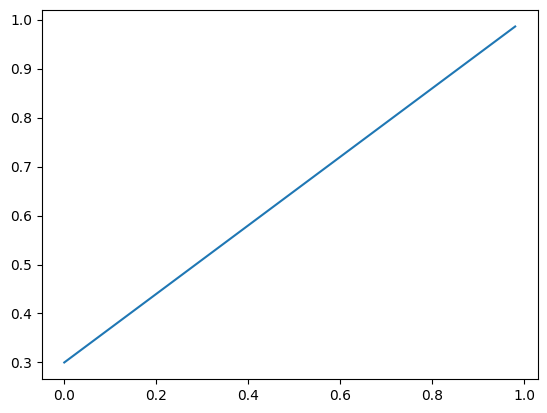

In [6]:
plt.plot(X, y)
plt.show()

### Splitting data into train and test sets

In [7]:
# create a train test split with 80:20
train_split = int(0.8 * len(X)) # gives 40
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

Visualize

In [8]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data and test data to compare predictions
  """
  plt.figure(figsize=(10, 7))

  # plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")

  # plot testdata in green
  plt.scatter(test_data, test_labels, c='g', s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # plot the predictions iff they exist
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

  # show the legend
  plt.legend(prop={'size': 14})




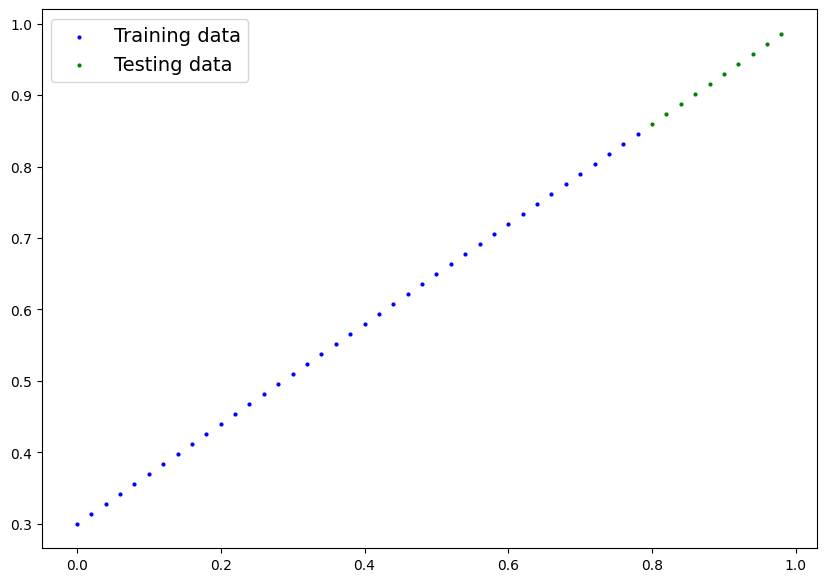

In [9]:
plot_predictions()

## Build model

What does our model do?:
* starts with random values for weights and biases
* look at training data and adjust the random values to better represent (or get close to) the ideal values (the weight and bias values used to create the data)

How does it do this?

Through two main algorithms:
1. Gradient descent
2. Backpropagation

In [10]:
from torch import nn
import torch

# create a linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in pytorch inherits from nn.Module
    def __init__(self):
               super().__init__()
               self.weights = nn.Parameter(torch.randn(1,
                                                       requires_grad=True,
                                                       dtype=torch.float))
               self.bias = nn.Parameter(torch.randn(1 ,
                                                    requires_grad=True,
                                                    dtype=torch.float))

    # forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- 'x' is the input data
        return self.weights * x + self.bias #this is the linear regression formula


### Pytorch model building essentials

* torch.nn - contains all of the buildings for computational graph An NN can be considered a computational graph
* torch.nn.Parameter - what parameters should our model try to learn, often a pytorch layer from torch.nn will set these for up
* toech.nn.module - the base class for all NN modules, if you subclass it, you should overwrite forward()
* torch.optim - this is where the optimizers in pytorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward()

### Check the contents inside the model

In [11]:
# create a random seed
torch.manual_seed(42)

# create an instance of the model
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
#  list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the forward()` method.

In [13]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [14]:
# keeps track of things we don't need and makes program slower so we use infrrece mode

y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [15]:
# make predictions with model
y_preds = None
with torch.inference_mode():
  y_preds = model_0(X_test)

# # you can do something similar with torch.no_grad
# with torch.no_grad():
#   y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

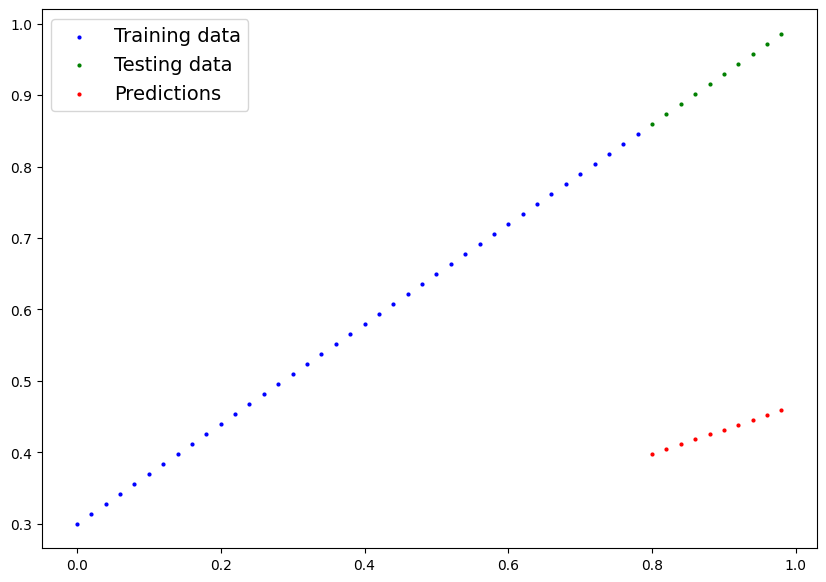

In [16]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whoel idea of training is fo a model to move from some *unknown* parameters (these may be random) to some *Known* parameters.

Or in other words, from a poor representation of the data to a beter representation f the data.

One way to measure how poor/wrong your model's predictions are is to use a loss function.

Things we need to train:

* loss function
* optimizer: takes into accout the loss of a model and adjusts the model's parameters(e.g weight & bias) to improve the loss function.

And specifically for pytorch, we need:
* a training loop
* a testing loop

In [17]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [18]:
# check out model's parameter
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [19]:
# set up loss function
# loss_fn = nn.MSELoss()
loss_fn = nn.L1Loss()

# set up optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters to optimiz
                            lr=0.01)
# optimizer = torch.optim.Adam(model_0.parameters(), lr=0.01)


In [20]:
loss_fn

L1Loss()

### Building a training loop (and a testing loop) in python

0. Loop throught the data multiple times
1. Forward pass/propagation(this involves data moving through our model's `forward()`functions) to make predictions on data
2. Calculate the loss (compare forward pass to ground truth labels)
3. Optimizer zero grad
4. Loss backward - moves backward throuh the network to calculate the gradient of each of the parameters of our model wrt the loss
5. Optimizer step

In [21]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [22]:
epochs = 200

# track experiment with different values
epoch_count = []
loss_values = []
test_loss_values = []

# TRAINING

# 0. Loop through the data
for epoch in range(epochs):

    # set the model to training modee
    model_0.train() # sets all parameters that requires gradients to require gradients

    # 1. forward pass
    y_pred = model_0(X_train)

    # 2. calculate a loss function
    loss = loss_fn(y_pred, y_train)
    # print(f'Loss: {loss}')

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. perform back propagation on the loss wrt the parameters of the model
    # loss.requires_grad = True
    loss.backward()

    # 5. step the optimizer(perform gradient descent)
    # this updates model parameters
    optimizer.step() # how optimizer chanes will accumulate through the loop, so we have to zero them above in step 3 for the next iteration of the loop


    # TESTING
    # turns off different settings in the model not needed for evauation/testing(like dropout/batchnorm)
    model_0.eval()

    with torch.inference_mode():# turns off gradient tracking
        # 1. forward pass
        test_pred = model_0(X_test)

        # 2. calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    # print out what's happening
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f'Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}')

        # print out model_state_dict()
        print(model_0.state_dict())


Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [23]:
# they are none which means we are not getting a gradient which in turn means the 'loss_backwad()' is not working
for param in model_0.parameters():
    print(param.grad)


tensor([-0.3900])
tensor([-1.])


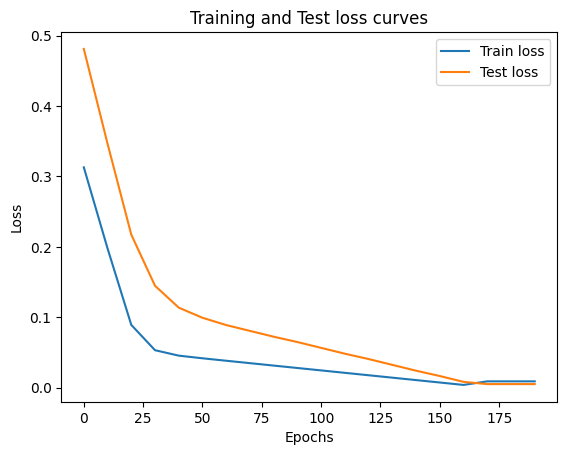

In [24]:
import numpy as np

# plot loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label='Train loss')
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.title('Training and Test loss curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

In [25]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

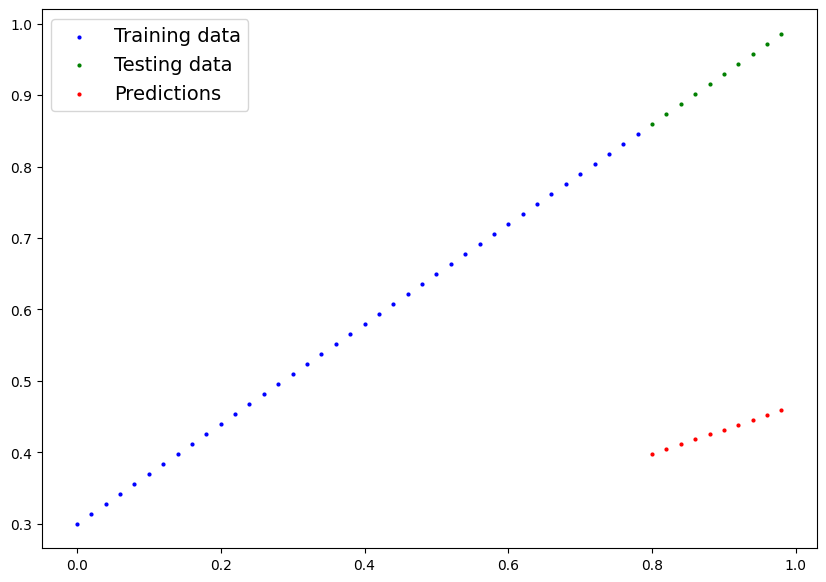

In [26]:
plot_predictions(predictions=y_preds)

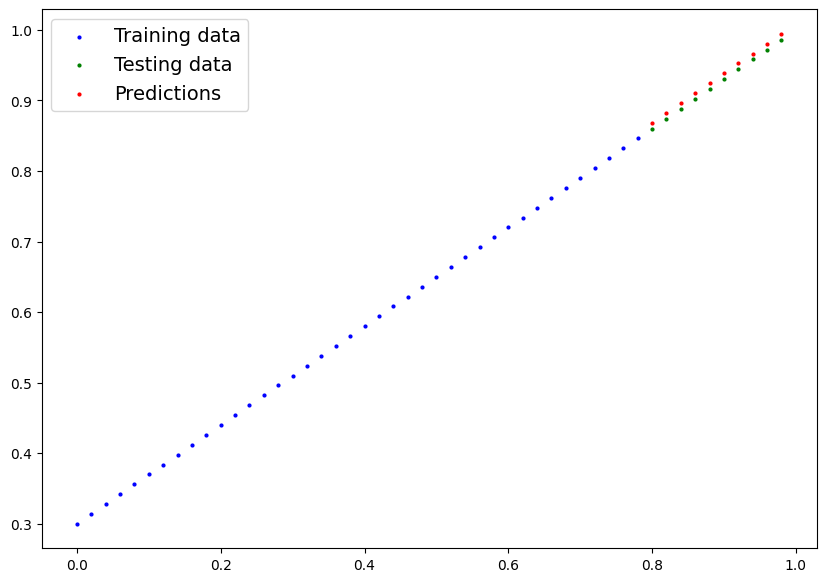

In [27]:
plot_predictions(predictions=y_preds_new)

In [28]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [29]:
weight, bias

(0.7, 0.3)

## Saving a model in PyTorch

There are 3 main methods that you should know for saving and loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in pickle format.
2. `torch.load()` - allows you to load a PyTorch object.
3. `torch.nn.Module.load_state_dict()` - allows you to load a model's saved state dictionary.

In [30]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create a model save path
MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

# 3. Save the model state_dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(model_0.state_dict(),
           MODEL_SAVE_PATH)


Saving model to: models/01_pytorch_workflow_model_0.pth


In [31]:
%ls -l models


total 4
-rw-r--r-- 1 root root 1680 Feb  6 10:56 01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

Since we saves our model's `state_dict()` rather tahn the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [32]:
# load
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))


<All keys matched successfully>

In [33]:
# make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [34]:
# compare loaded model with original model preds

y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Go through the steps above and see it all in one place

In [35]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# check version
torch.__version__

'2.1.0+cu121'

Create device-agnostic code

This means if we have access to a GPU, our code will use it (for faster computing).
If no GPU is available, the code will default to using CPU.

In [36]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cpu


In [37]:
# %nvidia-smi

### 6.1 Data

In [38]:
# create some data using the linear regression formula
weight = 0.7
bias = 0.3

# create range values
start = 0
end = 1
step = 0.02

# create X and y
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [39]:
# split data
train_size = int(0.8 * len(X))
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

len(X_train), len( y_train), len(X_test ), len(y_test)

(40, 40, 10, 10)

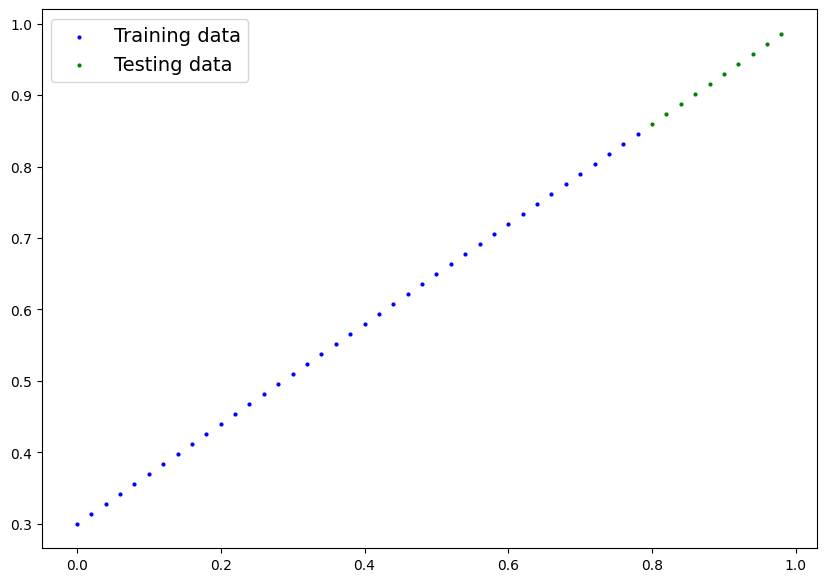

In [40]:
# plot the data
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 Build a PyTorch Linear model

In [41]:
class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, # take in 1 feature x i.e a line of x
                                      out_features=1) # to output a value for y
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)


# create a random seed
torch.manual_seed(42)

linear_model = LinearModel()
linear_model, linear_model.state_dict()

(LinearModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [42]:
# check current model device
next(linear_model.parameters()).device

device(type='cpu')

In [43]:
# set model to use target device
linear_model.to(device)

LinearModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

### 6.3 Training

* loss function
* Optimizer
* Training loop
* Testing loop

In [44]:
loss_funct = nn.L1Loss()
optimizer = torch.optim.SGD(params=linear_model.parameters(), lr=0.01 )

torch.manual_seed(42)
epochs = 200

# # put data on target device
# X_train = X_train.to(device)

# track experiment with different values
epoch_count = []
loss_values = []
test_loss_values = []

# train
for epoch in range(epochs):
    linear_model.train()
    predictions = linear_model(X_train)

    loss = loss_funct(predictions, y_train)

    optimizer.zero_grad()

    # loss.requires_grad = True
    loss.backward()

    optimizer.step()

    # TEST
    linear_model.eval()

    with torch.inference_mode():
        test_predictions = linear_model(X_test)

        test_loss = loss_funct(test_predictions, y_test)

        if epoch % 10 == 0:
            epoch_count.append(epoch)
            loss_values.append(loss)
            test_loss_values.append(test_loss)
            print(f'Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}')

            # print out model_state_dict()
            print(model_0.state_dict())


Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
Epoch: 10 | Loss: 0.4399680495262146 | Test loss: 0.4392663538455963
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
Epoch: 30 | Loss: 0.20954827964305878 | Test loss: 0.16984674334526062
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
Epoch: 40 | Loss: 0.09433844685554504 | Test loss: 0.03513689711689949
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
Epoch: 50 | Loss: 0.023886386305093765 | Test loss: 0.04784906655550003
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
Epoch: 60 | Loss: 0.0199567973613739 | Test loss: 0.04580312222242355
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))]

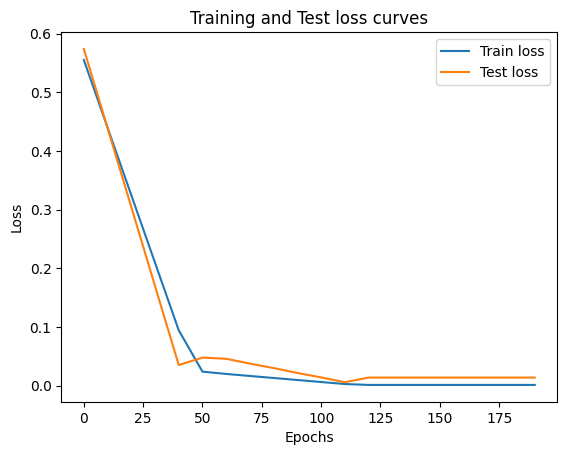

In [45]:
# plot loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label='Train loss')
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.title('Training and Test loss curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

### 6.4 Making and evaluating predictions

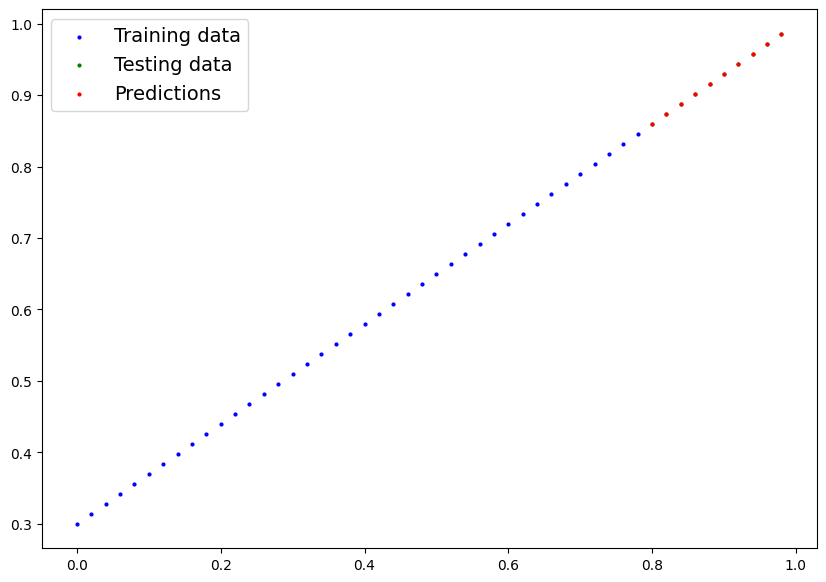

In [48]:
linear_model.eval()
with torch.inference_mode():
    new_y_pred = linear_model(X_test)

plot_predictions(predictions=new_y_pred.cpu())

### 6.5 Saving and loading a model

In [51]:
from pathlib import Path

# # 1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create a model save path
MODEL_NAME = '01_pytorch_workflow_model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

# 3. Save the model state_dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(linear_model.state_dict(),
           MODEL_SAVE_PATH)


Saving model to: models/01_pytorch_workflow_model_1.pth


In [52]:
# load
loaded_model_1 = LinearModel()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# put loaded model to device
loaded_model_1.to(device)
next(loaded_model_1.parameters()).device

<All keys matched successfully>

In [54]:
# make some predictions with our loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_1(X_test)

# compare loaded model with original model preds
new_y_pred == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## [Exercises and Extra curriculum](https://colab.research.google.com/drive/142UtpQs7zx3ciGFaJsxYOokpsdRwJ8ks?hl=en#scrollTo=N8LsPXZti9Sw)
